<font size="6">**1. Load the original Building America Hot Water calculation excel file**</font>

In [57]:
from openpyxl import Workbook, load_workbook
from openpyxl.worksheet.datavalidation import DataValidation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
wb = load_workbook('/Users/meftahuddin/Desktop/Codes/BuildingAmerica_DHW.xlsm',keep_vba=True)

print(wb.sheetnames)

['User Inputs', 'Std 1br', 'Std 2br', 'Std 3br', 'Std 4br', 'Std 5br', 'Weather Inputs', 'Weather Data', 'Daily Mains']


In [5]:
# Getting the actual sheets inside spreadsheet to work with
ws1 = wb['User Inputs']

In [7]:
# Check the dropdown input options inside sheets using dataValidation library of openpyxl
ws1.data_validations.dataValidation

[<openpyxl.worksheet.datavalidation.DataValidation object>
 Parameters:
 sqref=<MultiCellRange [B3]>, showDropDown=False, showInputMessage=True, showErrorMessage=True, allowBlank=False, errorTitle=None, error=None, promptTitle=None, prompt=None, type='list', errorStyle=None, imeMode=None, operator=None, formula1='INDIRECT("\'Weather Data\'!A3:A1013")', formula2=None,
 <openpyxl.worksheet.datavalidation.DataValidation object>
 Parameters:
 sqref=<MultiCellRange [B4]>, showDropDown=False, showInputMessage=True, showErrorMessage=True, allowBlank=False, errorTitle=None, error=None, promptTitle=None, prompt=None, type='list', errorStyle=None, imeMode=None, operator=None, formula1='"1,2,3,4,5"', formula2=None,
 <openpyxl.worksheet.datavalidation.DataValidation object>
 Parameters:
 sqref=<MultiCellRange [B5]>, showDropDown=False, showInputMessage=True, showErrorMessage=True, allowBlank=False, errorTitle=None, error=None, promptTitle=None, prompt=None, type='decimal', errorStyle=None, imeMode

In [9]:
# Finding datavalidation cells inside sheets and making them a list

for i in range(len(ws1.data_validations.dataValidation)):
    user_input_cell_location = list(ws1.data_validations.dataValidation[i].sqref.ranges)[0].coord
    
    if ws1.data_validations.dataValidation[i].formula1 != None:
        user_input_options = ws1.data_validations.dataValidation[i].formula1.replace('"', '').split(',')
        
    print(f'{user_input_cell_location} contains: {user_input_options}')

B3 contains: ["INDIRECT('Weather Data'!A3:A1013)"]
B4 contains: ['1', '2', '3', '4', '5']
B5 contains: ['120']
B6 contains: ['95']


<font size="6">**2. Cheking location input for B3 cell from 'Weather Data' sheets**</font>

In [12]:
ws2 = wb['Weather Data']

weather_stations = []
for row in ws2.iter_rows(min_col=1, max_col=1):
    for cell in row:
        weather_stations.append(cell.value)

In [14]:
# Allowed input values 
_input_weather = weather_stations
_input_bed = ['1', '2', '3', '4', '5']

In [16]:
# Define the keyword to search for
keyword = 'Columbia'

# Find and print the full names containing the keyword
matching_stations = [station for station in weather_stations if keyword.lower() in station.lower()]

print("Matching weather stations:")
for station in matching_stations:
    print(station)


Matching weather stations:
Columbia Rgnl AP, MO
Columbia Metro AP, SC


<font size="6">**3. User input of location and bedrooms and saving new macros .xlsm file**</font>

In [22]:

# Manual input of locational data and bed rooms
input_cells = {
    'B3': 'Columbia Metro AP, SC', # City input
    'B4': '2'                      # bedrooms
}

# Functions for validity of the inputs
def is_valid(cell, value):
    if cell.coordinate == 'B3':
        return value in _input_weather
    elif cell.coordinate == 'B4':
        return value in _input_bed
    return False

# Input values if valid
for cell_coord, value in input_cells.items():
    cell = ws1[cell_coord]
    if is_valid(cell, value):
        cell.value = value
        print(f"Input '{value}' into cell {cell.coordinate}.")
    else:
        print(f"'{value}' is not a valid option for cell {cell.coordinate}.")

Input 'Columbia Metro AP, SC' into cell B3.
Input '2' into cell B4.


In [24]:
# Save the workbook
wb.save('new_building_america.xlsm')

<font size="6">**4. Loading new files and renaming to a new pandas dataframe**</font>

In [27]:
wb2 = load_workbook('/Users/meftahuddin/Desktop/Codes/new_building_america.xlsm',data_only=True)

print(wb2.sheetnames)

['User Inputs', 'Std 1br', 'Std 2br', 'Std 3br', 'Std 4br', 'Std 5br', 'Weather Inputs', 'Weather Data', 'Daily Mains']


In [29]:
import pandas as pd

In [31]:
sheet1 = wb2['User Inputs']

# Extract column names from row 2 (columns 5 to 10)
column_names = [cell.value for cell in sheet1[2][4:10]]  # Columns 5 to 10 are indices 4 to 9

# Initialize a list to store the data
data = []

# Iterate over rows starting from row 3 (row 2 is header), columns 5 to 10
for row in sheet1.iter_rows(min_row=3, min_col=5, max_col=10, max_row=12715, values_only=True):
    data.append(row)

# Create a pandas DataFrame from the list of rows
df = pd.DataFrame(data, columns=column_names)

df.head()

,Start Time,Duration (sec),Fixture,Flow Rate\nHot & Cold\n(gpm),Flow Rate\nHot Only\n(gpm),Flow Rate\nCold Only\n(gpm)
0,2007-01-01 00:33:54,96,Sink 2,0.935,0.758672,0.176328
1,2007-01-01 00:35:48,114,Kitchen Sink,0.051,0.041382,0.009618
2,2007-01-01 00:37:48,54,Sink 2,1.311,1.063764,0.247236
3,2007-01-01 00:39:42,18,Sink 4,0.628,0.509568,0.118432
4,2007-01-01 06:51:00,336,Shower 2,2.361,1.915749,0.445251


In [33]:
df.tail()

,Start Time,Duration (sec),Fixture,Flow Rate\nHot & Cold\n(gpm),Flow Rate\nHot Only\n(gpm),Flow Rate\nCold Only\n(gpm)
12708,2007-12-31 20:30:24,6,Kitchen Sink,0.410,0.332601,0.077399
12709,2007-12-31 20:38:30,30,Kitchen Sink,1.429,1.159237,0.269763
12710,2007-12-31 21:43:00,12,Kitchen Sink,2.034,1.650027,0.383973
12711,2007-12-31 22:18:00,42,Kitchen Sink,0.402,0.326112,0.075888
12712,2007-12-31 22:19:54,6,Kitchen Sink,0.138,0.111949,0.026051


In [35]:
df.columns

Index(['Start Time', 'Duration (sec)', 'Fixture',
       'Flow Rate\nHot & Cold\n(gpm)', 'Flow Rate\nHot Only\n(gpm)',
       'Flow Rate\nCold Only\n(gpm)'],
      dtype='object')

In [37]:
df = df.rename(columns={
    "Start Time": "datetime",
    "Flow Rate\nHot & Cold\n(gpm)": "w_gpm",
    "Flow Rate\nHot Only\n(gpm)": "hw_gpm",
    "Flow Rate\nCold Only\n(gpm)": "cw_gpm"
})
df.head()

,datetime,Duration (sec),Fixture,w_gpm,hw_gpm,cw_gpm
0,2007-01-01 00:33:54,96,Sink 2,0.935,0.758672,0.176328
1,2007-01-01 00:35:48,114,Kitchen Sink,0.051,0.041382,0.009618
2,2007-01-01 00:37:48,54,Sink 2,1.311,1.063764,0.247236
3,2007-01-01 00:39:42,18,Sink 4,0.628,0.509568,0.118432
4,2007-01-01 06:51:00,336,Shower 2,2.361,1.915749,0.445251


In [39]:
# Opt into the new behavior regarding downcasting
pd.set_option('future.no_silent_downcasting', True)

df2 = df.copy()

df2['datetime'] = pd.to_datetime(df2['datetime'])
df2.set_index('datetime', inplace=True)

aggregated_df2 = df2.resample('h').agg({
    'Duration (sec)': 'sum',
    'Fixture': lambda x: x.mode()[0] if not x.mode().empty else 'Not in use',
    'w_gpm': 'mean',
    'hw_gpm': 'mean',
    'cw_gpm': 'mean'
})

date_range = pd.date_range(start='2007-01-01', end='2008-1-1', freq='h')
full_year_df2 = pd.DataFrame(index=date_range)

final_df2 = full_year_df2.join(aggregated_df2)

# Fill NaN values with 0
final_df2.fillna(0, inplace=True)

# Ensure that object columns are inferred correctly
final_df2 = final_df2.infer_objects()

final_df2.head(10)

,Duration (sec),Fixture,w_gpm,hw_gpm,cw_gpm
2007-01-01 00:00:00,282.0,Sink 2,0.731250,0.593347,0.137903
2007-01-01 01:00:00,0.0,Not in use,0.000000,0.000000,0.000000
2007-01-01 02:00:00,0.0,Not in use,0.000000,0.000000,0.000000
2007-01-01 03:00:00,0.0,Not in use,0.000000,0.000000,0.000000
2007-01-01 04:00:00,0.0,Not in use,0.000000,0.000000,0.000000
2007-01-01 05:00:00,0.0,Not in use,0.000000,0.000000,0.000000
2007-01-01 06:00:00,336.0,Shower 2,2.361000,1.915749,0.445251
2007-01-01 07:00:00,1356.0,Kitchen Sink,1.848333,1.499764,0.348570
2007-01-01 08:00:00,240.0,Kitchen Sink,2.264600,1.837528,0.427072
2007-01-01 09:00:00,96.0,Kitchen Sink,1.805000,1.464602,0.340398


In [41]:
final_df2['datetime'] = final_df2.index
final_df2.index = range(1, len(final_df2) + 1)

first_column = final_df2.pop('datetime') 
final_df2.insert(0, 'datetime', first_column) 

final_df2.head(10)

,datetime,Duration (sec),Fixture,w_gpm,hw_gpm,cw_gpm
1,2007-01-01 00:00:00,282.0,Sink 2,0.731250,0.593347,0.137903
2,2007-01-01 01:00:00,0.0,Not in use,0.000000,0.000000,0.000000
3,2007-01-01 02:00:00,0.0,Not in use,0.000000,0.000000,0.000000
4,2007-01-01 03:00:00,0.0,Not in use,0.000000,0.000000,0.000000
5,2007-01-01 04:00:00,0.0,Not in use,0.000000,0.000000,0.000000
6,2007-01-01 05:00:00,0.0,Not in use,0.000000,0.000000,0.000000
7,2007-01-01 06:00:00,336.0,Shower 2,2.361000,1.915749,0.445251
8,2007-01-01 07:00:00,1356.0,Kitchen Sink,1.848333,1.499764,0.348570
9,2007-01-01 08:00:00,240.0,Kitchen Sink,2.264600,1.837528,0.427072
10,2007-01-01 09:00:00,96.0,Kitchen Sink,1.805000,1.464602,0.340398


In [43]:
# Define the new year
new_year = 2024

# Change the year in the datetime column
final_df2['datetime'] = final_df2['datetime'].apply(lambda dt: dt.replace(year=new_year))
final_df2.head(10)

,datetime,Duration (sec),Fixture,w_gpm,hw_gpm,cw_gpm
1,2024-01-01 00:00:00,282.0,Sink 2,0.731250,0.593347,0.137903
2,2024-01-01 01:00:00,0.0,Not in use,0.000000,0.000000,0.000000
3,2024-01-01 02:00:00,0.0,Not in use,0.000000,0.000000,0.000000
4,2024-01-01 03:00:00,0.0,Not in use,0.000000,0.000000,0.000000
5,2024-01-01 04:00:00,0.0,Not in use,0.000000,0.000000,0.000000
6,2024-01-01 05:00:00,0.0,Not in use,0.000000,0.000000,0.000000
7,2024-01-01 06:00:00,336.0,Shower 2,2.361000,1.915749,0.445251
8,2024-01-01 07:00:00,1356.0,Kitchen Sink,1.848333,1.499764,0.348570
9,2024-01-01 08:00:00,240.0,Kitchen Sink,2.264600,1.837528,0.427072
10,2024-01-01 09:00:00,96.0,Kitchen Sink,1.805000,1.464602,0.340398


<font size="6">**4. Making visuals of the water data**</font>

In [285]:
final_df2 = final_df2[:8760].copy()
#final_df2 = final_df2.drop(['Duration (sec)'], axis=1)
final_df2.tail()

,datetime,Duration (sec),Fixture,w_gpm,hw_gpm,cw_gpm
8756,2024-12-31 19:00:00,150.0,Kitchen Sink,0.912750,0.740444,0.172306
8757,2024-12-31 20:00:00,48.0,Kitchen Sink,0.766667,0.621937,0.144729
8758,2024-12-31 21:00:00,12.0,Kitchen Sink,2.034000,1.650027,0.383973
8759,2024-12-31 22:00:00,48.0,Kitchen Sink,0.270000,0.219030,0.050970
8760,2024-12-31 23:00:00,0.0,0,0.000000,0.000000,0.000000


**1. Water use duration in minutes by different fixtures at different hours of a day**

In [288]:
str_data1 = final_df2.copy()

str_data1['Duration (min)'] = str_data1['Duration (sec)']/60
str_data1 = str_data1.drop(['Duration (sec)'], axis=1)
str_data1 = str_data1[str_data1['Fixture'] != 'Not in use']

str_data1['hour'] = str_data1['datetime'].dt.hour
average_durations = str_data1.groupby(['hour', 'Fixture'])['Duration (min)'].mean().reset_index()
#average_durations = hourly_durations.groupby(['hour', 'Fixture'])['Duration (min)'].mean().reset_index()

str_data1.head()


,datetime,Fixture,w_gpm,hw_gpm,cw_gpm,Duration (min),hour
1,2024-01-01 00:00:00,Sink 2,0.731250,0.593347,0.137903,4.7,0
7,2024-01-01 06:00:00,Shower 2,2.361000,1.915749,0.445251,5.6,6
8,2024-01-01 07:00:00,Kitchen Sink,1.848333,1.499764,0.348570,22.6,7
9,2024-01-01 08:00:00,Kitchen Sink,2.264600,1.837528,0.427072,4.0,8
10,2024-01-01 09:00:00,Kitchen Sink,1.805000,1.464602,0.340398,1.6,9


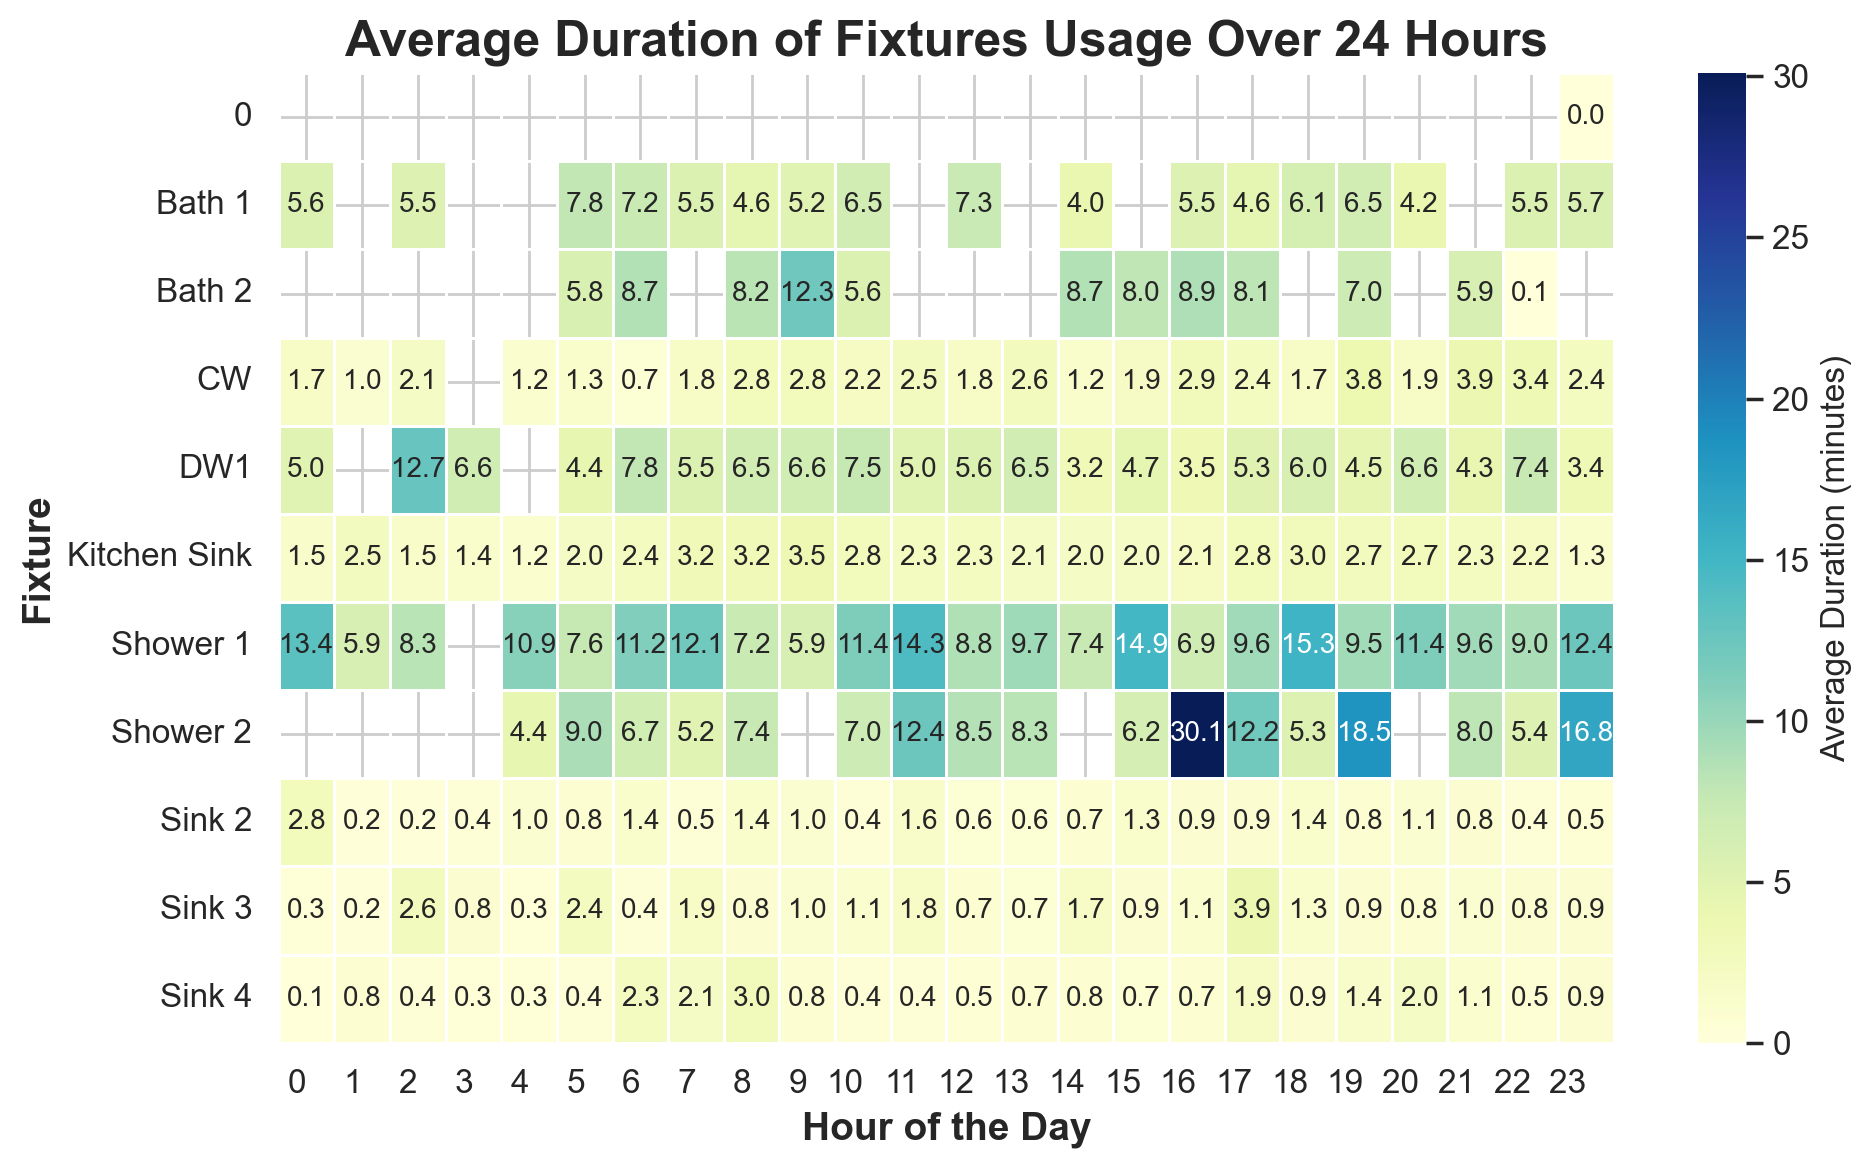

In [294]:
try:
    # Pivot the data for heatmap
    heatmap_data = average_durations.pivot(index="Fixture", columns="hour", values="Duration (min)")
    
    # Set up the plotting environment
    plt.figure(figsize=(10, 6), dpi=200)

    # Plotting the heatmap
    ax = sns.heatmap(
        heatmap_data,
        cmap="YlGnBu",
        annot=True,
        fmt=".1f",
        linewidths=.5,
        cbar_kws={'label': 'Average Duration (minutes)'},
        annot_kws={'size': 10}
    )

    # Customize the title and labels
    plt.title('Average Duration of Fixtures Usage Over 24 Hours', fontsize=18, weight='bold')
    plt.xlabel('Hour of the Day', fontsize=14, weight='bold')
    plt.ylabel('Fixture', fontsize=14, weight='bold')

    # Customize the ticks and tick labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right', fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=12)

    # Customize the colorbar
    colorbar = ax.collections[0].colorbar
    colorbar.ax.tick_params(labelsize=12)

    # Display the plot
    plt.tight_layout()
    plt.show()

except ValueError as e:
    print(f"ValueError: {e}")
except TypeError as e:
    print(f"TypeError: {e}")
except Exception as e:
    print(f"An error occurred: {e}")



**2. Hot water used at different hours of a day by different equipment**

In [296]:
str_data2 = final_df2.copy()

str_data2 = str_data2[str_data2['Fixture'] != 'Not in use']

str_data2['hour'] = str_data2['datetime'].dt.hour
average_durations = str_data2.groupby(['hour', 'Fixture'])['hw_gpm'].mean().reset_index()
#average_durations = hourly_durations.groupby(['hour', 'Fixture'])['Duration (min)'].mean().reset_index()

str_data2.head()


,datetime,Duration (sec),Fixture,w_gpm,hw_gpm,cw_gpm,hour
1,2024-01-01 00:00:00,282.0,Sink 2,0.731250,0.593347,0.137903,0
7,2024-01-01 06:00:00,336.0,Shower 2,2.361000,1.915749,0.445251,6
8,2024-01-01 07:00:00,1356.0,Kitchen Sink,1.848333,1.499764,0.348570,7
9,2024-01-01 08:00:00,240.0,Kitchen Sink,2.264600,1.837528,0.427072,8
10,2024-01-01 09:00:00,96.0,Kitchen Sink,1.805000,1.464602,0.340398,9


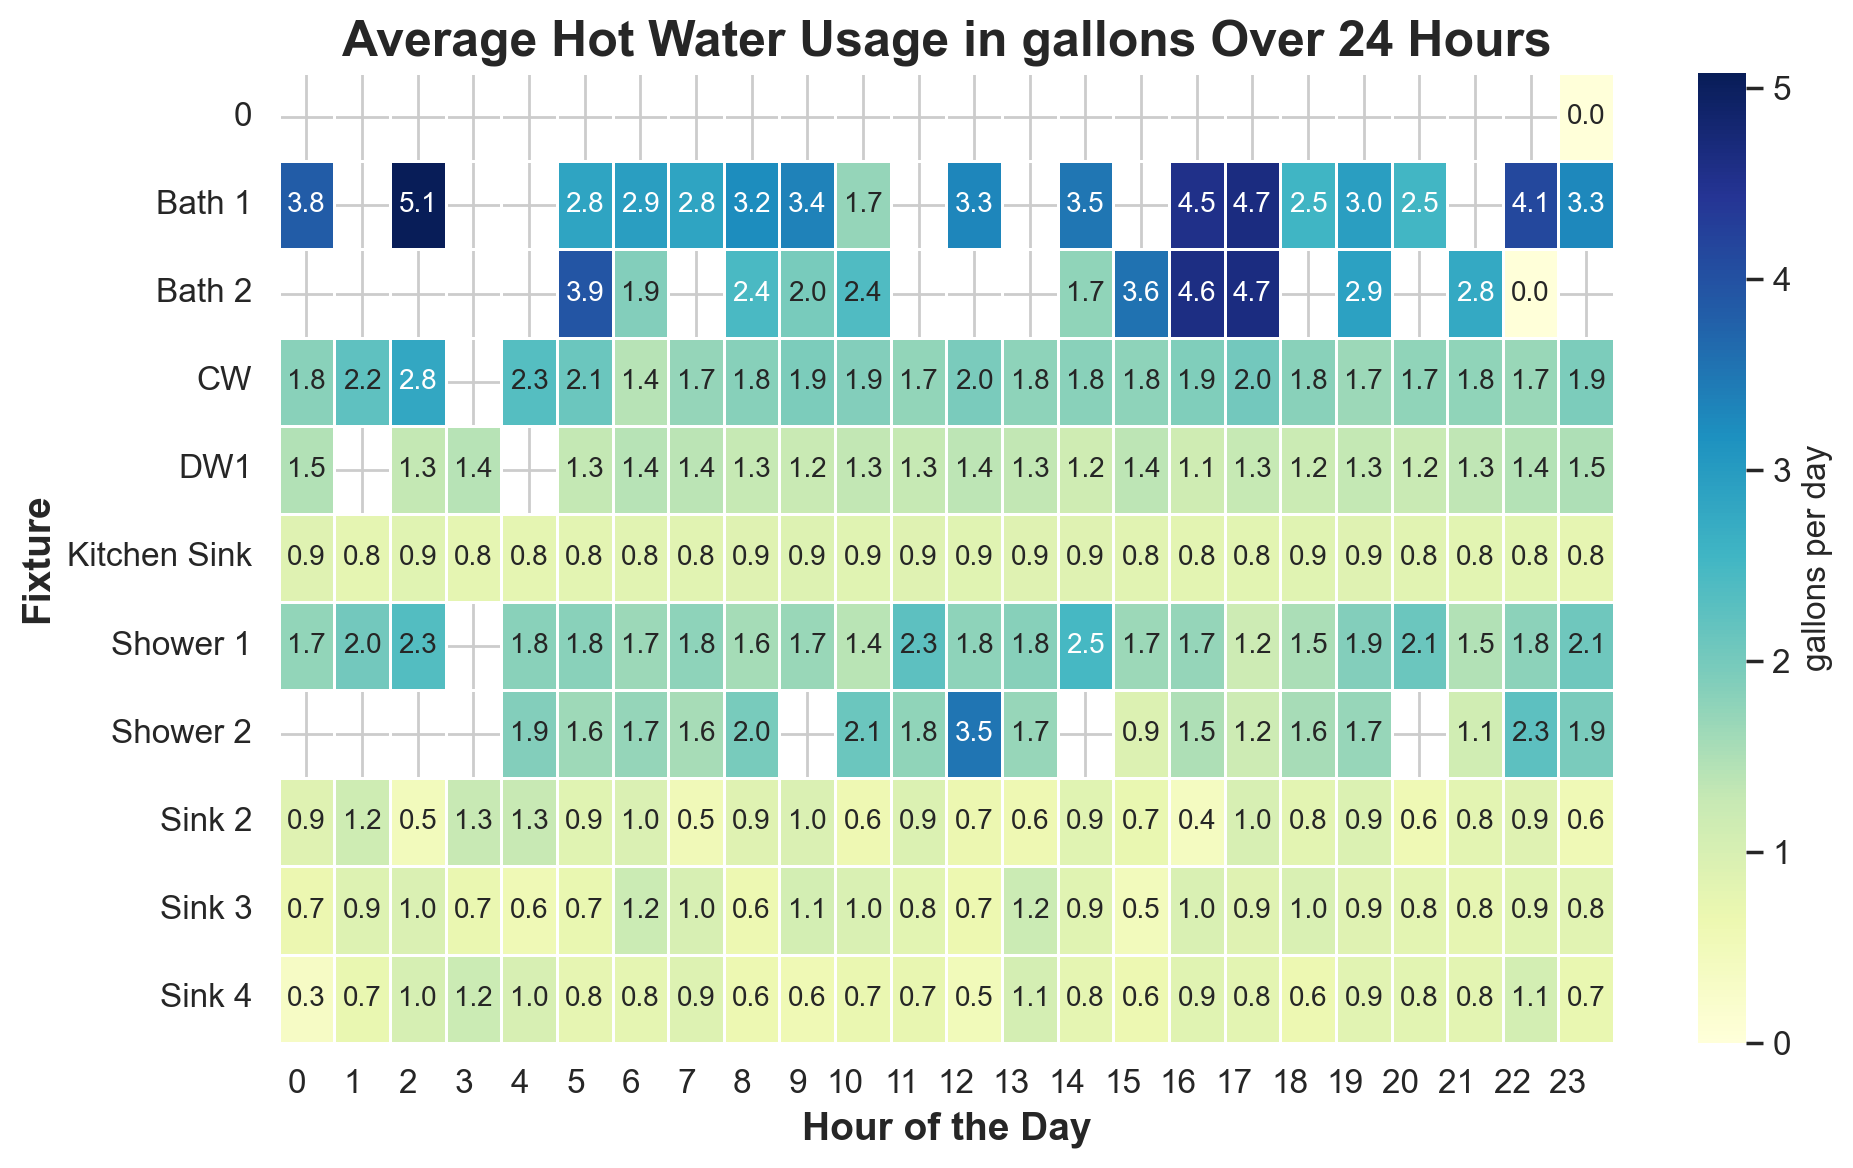

In [300]:
try:
    # Pivot the data for heatmap
    heatmap_data = average_durations.pivot(index="Fixture", columns="hour", values="hw_gpm")
    
    # Set up the plotting environment
    plt.figure(figsize=(10, 6), dpi=200)

    # Plotting the heatmap
    ax = sns.heatmap(
        heatmap_data,
        cmap="YlGnBu",
        annot=True,
        fmt=".1f",
        linewidths=.5,
        cbar_kws={'label': 'gallons per day'},
        annot_kws={'size': 10}
    )

    # Customize the title and labels
    plt.title('Average Hot Water Usage in gallons Over 24 Hours', fontsize=18, weight='bold')
    plt.xlabel('Hour of the Day', fontsize=14, weight='bold')
    plt.ylabel('Fixture', fontsize=14, weight='bold')

    # Customize the ticks and tick labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right', fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=12)

    # Customize the colorbar
    colorbar = ax.collections[0].colorbar
    colorbar.ax.tick_params(labelsize=12)

    # Display the plot
    plt.tight_layout()
    plt.show()

except ValueError as e:
    print(f"ValueError: {e}")
except TypeError as e:
    print(f"TypeError: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


**3. Monthly Water uses**

In [303]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")


In [305]:
str_data3 = final_df2.copy()

str_data3['datetime'] = pd.to_datetime(str_data3['datetime'], errors='coerce')
str_data3 = str_data3.dropna(subset=['datetime'])
str_data3.set_index('datetime', inplace=True)

str_data3 = str_data3.drop(['Fixture'], axis=1)

daily_hw = str_data3.resample('D').sum()

daily_hw.head()

,Duration (sec),w_gpm,hw_gpm,cw_gpm
datetime,,,,
2024-01-01,3630.0,20.555731,17.226486,3.329245
2024-01-02,336.0,10.325750,8.380205,1.945545
2024-01-03,3240.0,14.431083,11.924763,2.506320
2024-01-04,2502.0,11.912725,9.672095,2.240630
2024-01-05,1530.0,14.446067,13.004069,1.441997


In [307]:
daily_hw['weekday'] = daily_hw.index.day_name()
weekday_avg = daily_hw.groupby('weekday')['hw_gpm'].mean()

weekday_avg = weekday_avg.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
weekday_avg.head()

weekday
Monday       13.238537
Tuesday      11.627742
Wednesday    12.115953
Thursday     11.754005
Friday       12.328656
Name: hw_gpm, dtype: float64

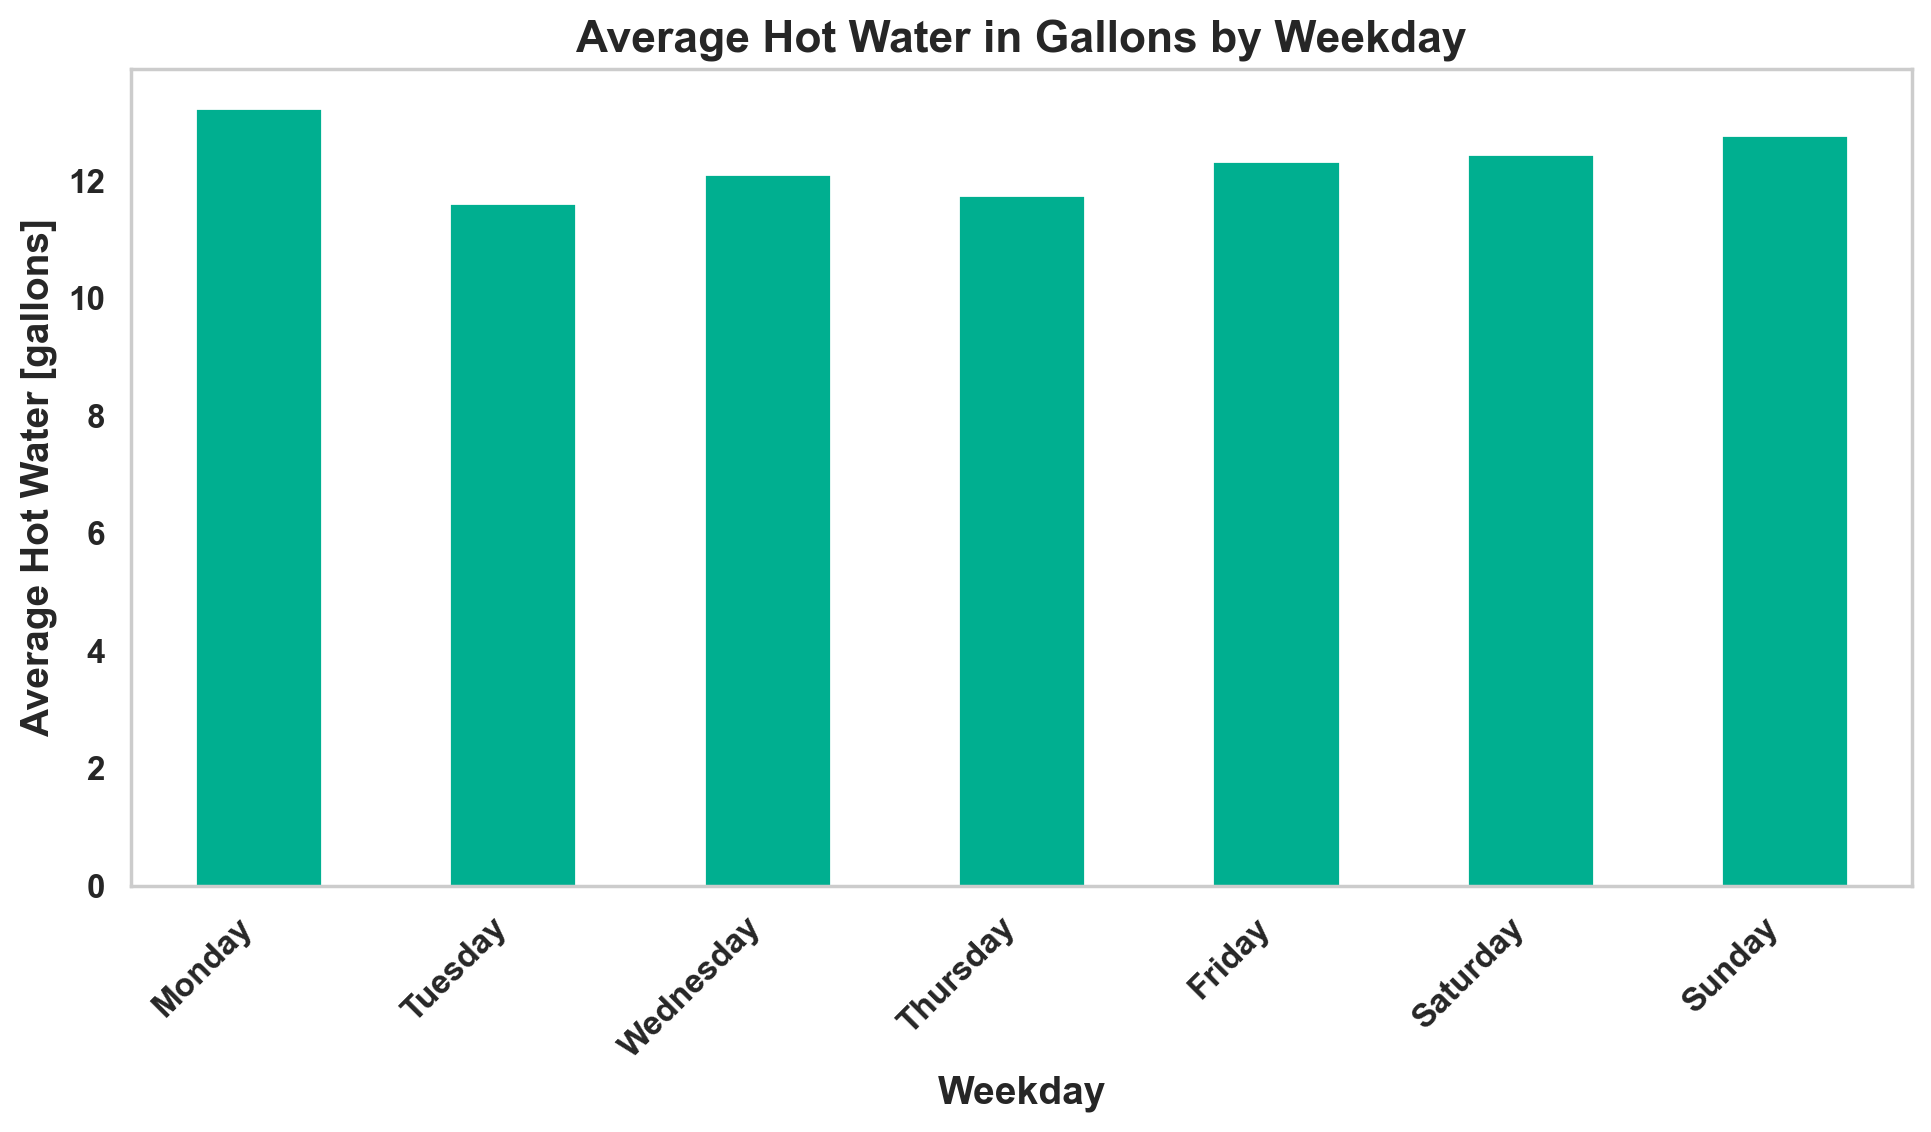

In [309]:
plt.figure(figsize=(10, 6), dpi=200)
weekday_avg.plot(kind='bar', color='#00af90')

plt.title('Average Hot Water in Gallons by Weekday', fontsize=16, weight='bold')
plt.xlabel('Weekday', fontsize=14, weight='bold')
plt.ylabel('Average Hot Water [gallons]', fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

**4. Monthly total hot water uses**

In [311]:
str_data4 = final_df2.copy()

str_data4['datetime'] = pd.to_datetime(str_data4['datetime'], errors='coerce')
str_data4 = str_data4.dropna(subset=['datetime'])
str_data4.set_index('datetime', inplace=True)

str_data4 = str_data4.drop(['Fixture'], axis=1)

monthly_totals = str_data4['hw_gpm'].resample('ME').sum()
monthly_totals.head()

datetime
2024-01-31    398.067471
2024-02-29    379.367138
2024-03-31    408.408339
2024-04-30    362.659556
2024-05-31    362.856198
Freq: ME, Name: hw_gpm, dtype: float64

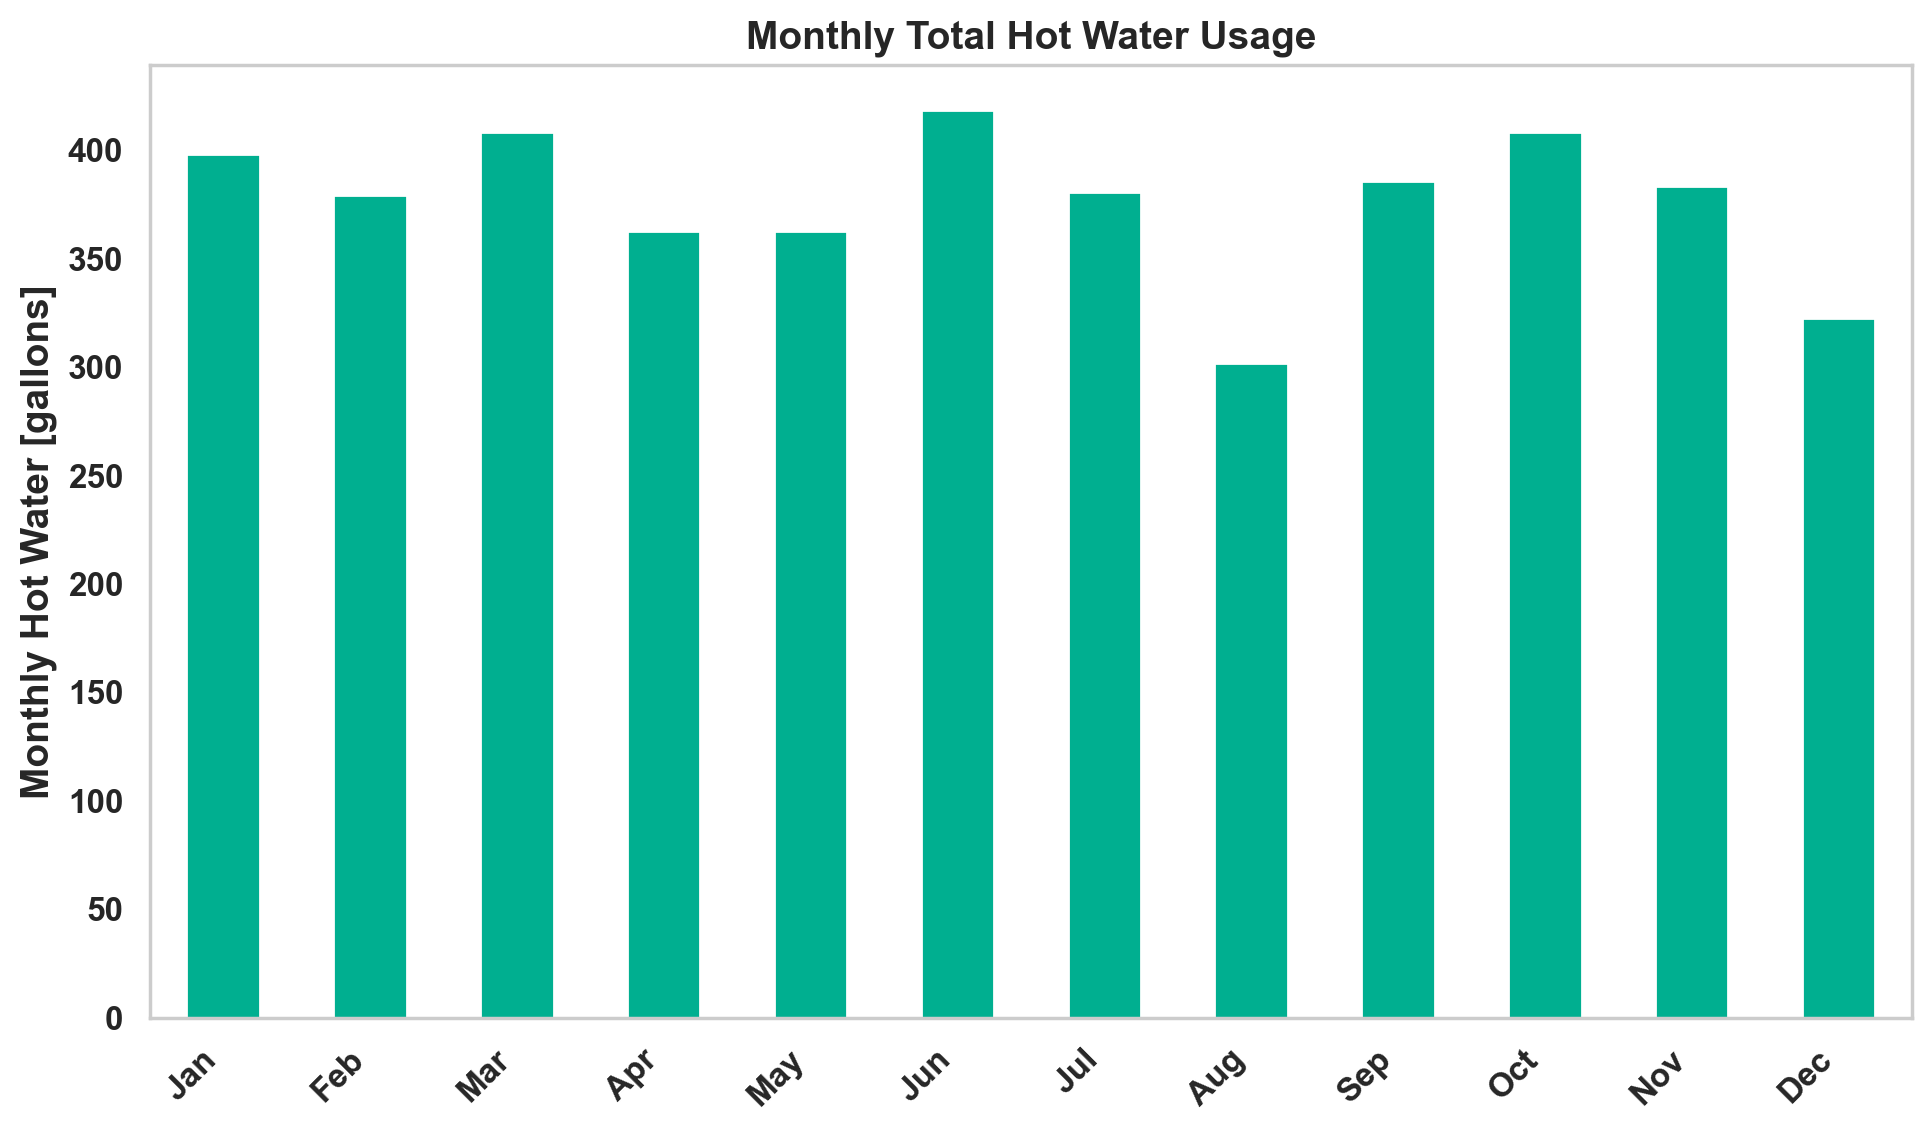

In [313]:
# Plot
plt.figure(figsize=(10, 6), dpi=200)
monthly_totals.plot(kind='bar', color='#00af90')

# Format x-ticks to show abbreviated month names
plt.xticks(ticks=range(len(monthly_totals.index)), labels=monthly_totals.index.strftime('%b'), rotation=45, ha='right')

plt.title('Monthly Total Hot Water Usage', fontsize=14, weight='bold')
plt.xlabel('', fontsize = 14, weight='bold')
plt.ylabel('Monthly Hot Water [gallons]', fontsize=14, weight='bold')
plt.yticks(fontsize=12,weight='bold')
plt.xticks(fontsize=12,weight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

**5. Hourly discripancy of Hot water use**

In [316]:
str_data5 = final_df2.copy()

str_data5['datetime'] = pd.to_datetime(str_data5['datetime'], errors='coerce')
str_data5 = str_data5.dropna(subset=['datetime'])  # Drop rows where 'datetime' could not be parsed
str_data5.set_index('datetime', inplace=True)

str_data5 = str_data5.drop(['Fixture'], axis=1, errors='ignore')  # Avoid error if 'Fixture' column does not exist

str_data5['hour'] = str_data5.index.hour

In [318]:
import seaborn as sns

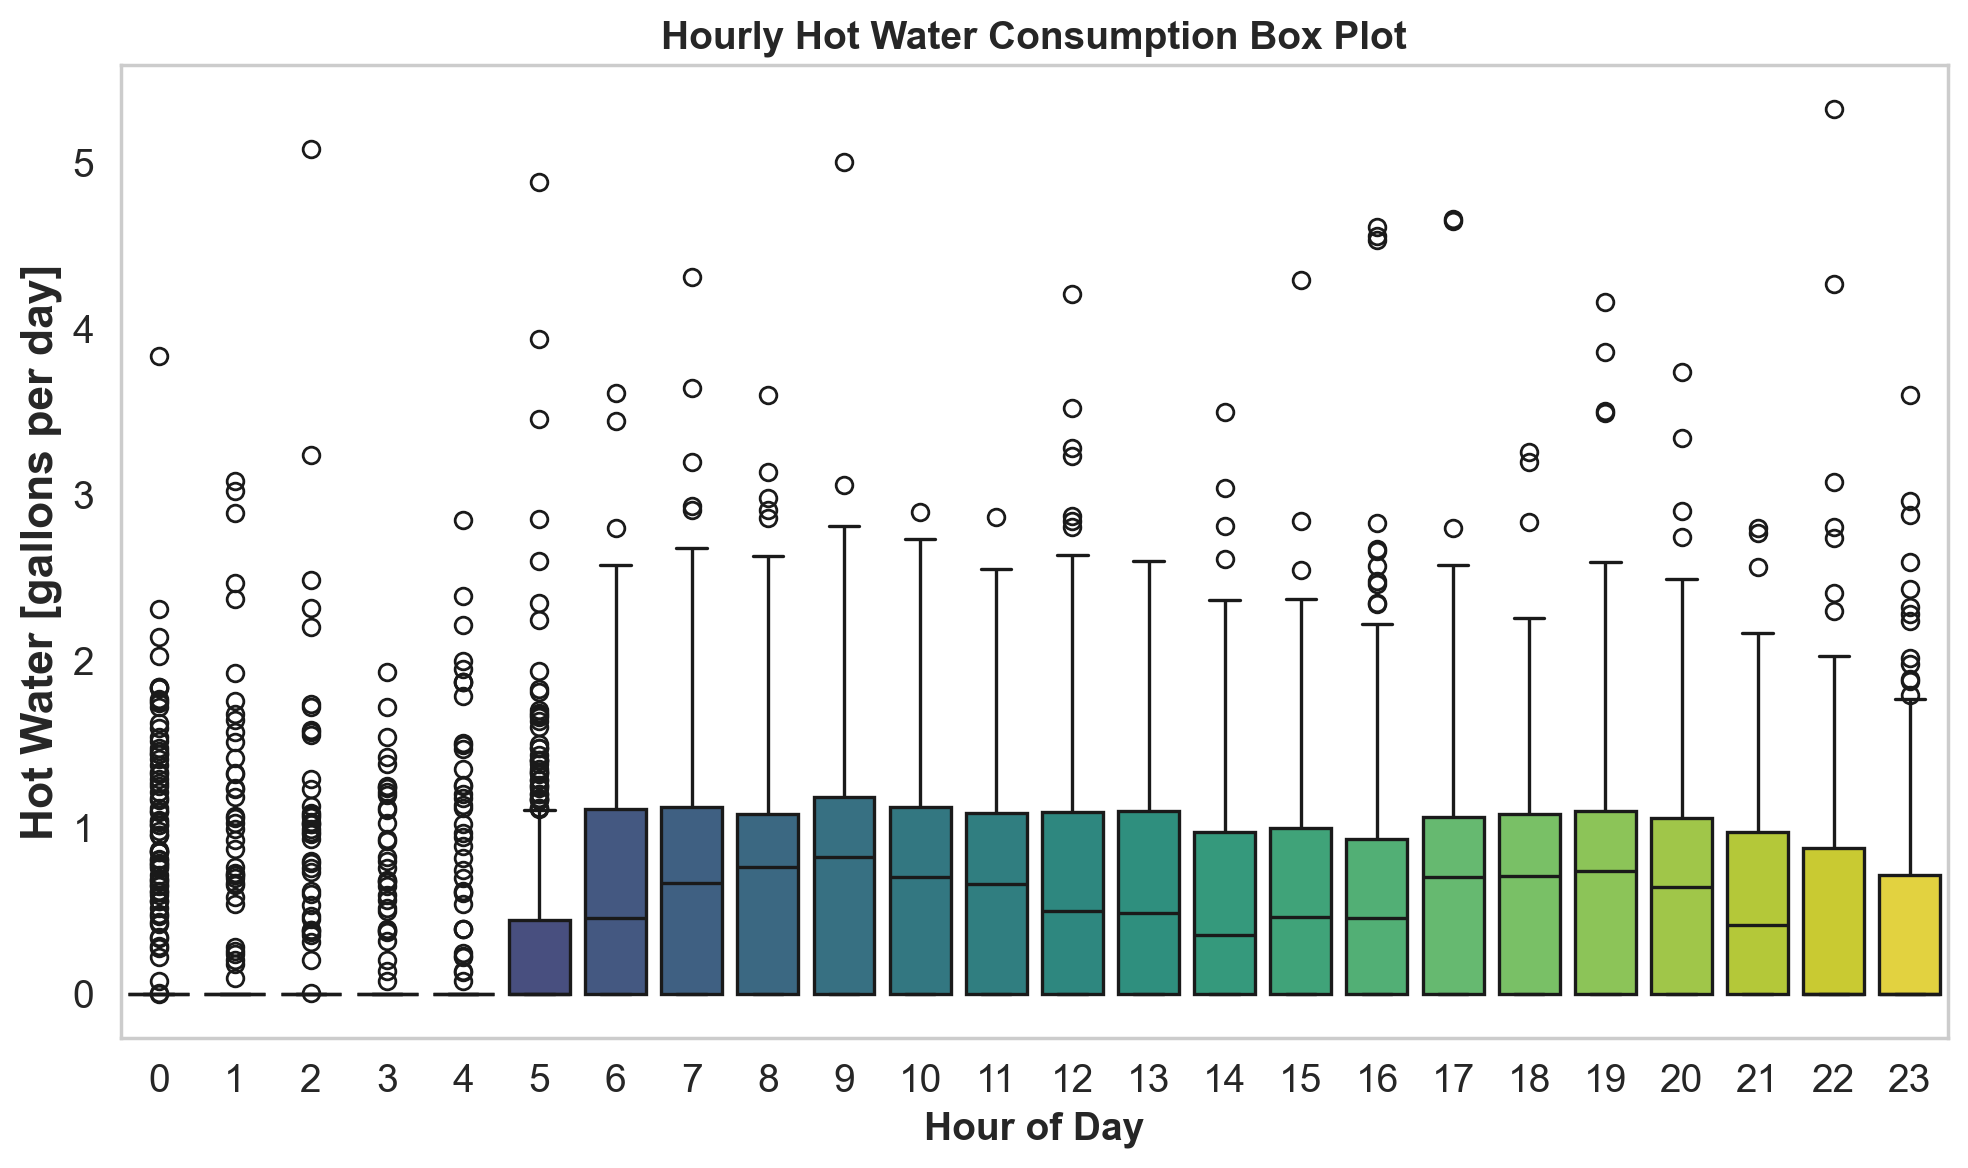

In [320]:
# Set the theme and style
sns.set_theme(style='whitegrid')

plt.figure(figsize=(10, 6), dpi=200)
sns.boxplot(x='hour', y='hw_gpm', data=str_data5,hue='hour', legend=False, palette='viridis', linewidth=1.2)

# Title and labels
plt.title('Hourly Hot Water Consumption Box Plot', fontsize=14, weight='bold')
plt.xlabel('Hour of Day', fontsize=14, weight='bold')
plt.ylabel('Hot Water [gallons per day]', fontsize=16, weight='bold')

# X and Y ticks
plt.xticks(ticks=range(24), labels=[f'{h}' for h in range(24)], fontsize=14)
plt.yticks(fontsize=14)

# Grid and style adjustments
plt.grid(False)
plt.tight_layout()

# Show plot
plt.show()
